In [67]:
import pandas as pd
import numpy as np

import datetime

import matplotlib.pyplot as plt
import matplotlib.patches as patches
import matplotlib.dates as mdates

import seaborn as sns
sns.set(rc={'figure.figsize':(28, 7)}, font_scale=2)
sns.set_style(style='whitegrid')

import math

import sys
sys.path.append('../')
import utils

In [68]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [69]:
df = pd.read_pickle('example/part2/df.pickle')

# Set some timestamps
df['timestamp'] = pd.date_range(start='2022-01-3 9:00', periods=len(df.index), freq='8.5714min')
df

,time,timestamp,measure,signal,noise,is_outlier,outlier_type,region_id,yhat,yhat_lower,...,unix_time,cluster_id,start,end,point_start,point_end,time_length,num_points,area,area_pts
0,0.000000,2022-01-03 09:00:00.000,0.030665,0.000000e+00,0.030665,0,NaN,NaN,0.034184,-0.334405,...,1.590970e+09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,0.037474,2022-01-03 09:08:34.284,-0.053556,3.746550e-02,-0.091021,0,NaN,NaN,0.066159,-0.268683,...,1.590973e+09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,0.074949,2022-01-03 09:17:08.568,0.008423,7.487838e-02,-0.066456,0,NaN,NaN,0.098290,-0.263955,...,1.590977e+09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,0.112423,2022-01-03 09:25:42.852,0.092491,1.121861e-01,-0.019695,0,NaN,NaN,0.130576,-0.214390,...,1.590980e+09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,0.149897,2022-01-03 09:34:17.136,0.200312,1.493364e-01,0.050976,0,NaN,NaN,0.163015,-0.204923,...,1.590984e+09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
499,18.699659,2022-01-06 08:17:07.716,-0.064313,-1.493364e-01,0.085023,0,NaN,NaN,-0.297393,-0.673388,...,1.592766e+09,9.0,1.592472e+09,1.592779e+09,1.592539e+09,1.592712e+09,306827.266711,32.0,0.632818,0.576681
500,18.737133,2022-01-06 08:25:42.000,-0.138420,-1.121861e-01,-0.026234,0,NaN,NaN,-0.267142,-0.608115,...,1.592770e+09,9.0,1.592472e+09,1.592779e+09,1.592539e+09,1.592712e+09,306827.266711,32.0,0.632818,0.576681
501,18.774607,2022-01-06 08:34:16.284,-0.141572,-7.487838e-02,-0.066694,0,NaN,NaN,-0.236791,-0.602803,...,1.592773e+09,9.0,1.592472e+09,1.592779e+09,1.592539e+09,1.592712e+09,306827.266711,32.0,0.632818,0.576681
502,18.812082,2022-01-06 08:42:50.568,-0.204324,-3.746550e-02,-0.166858,0,NaN,NaN,-0.206325,-0.582077,...,1.592777e+09,9.0,1.592472e+09,1.592779e+09,1.592539e+09,1.592712e+09,306827.266711,32.0,0.632818,0.576681


# Raw Time Series

In [70]:
raw_outliers_df = df[df['is_outlier_raw_data_fit'] > 0]

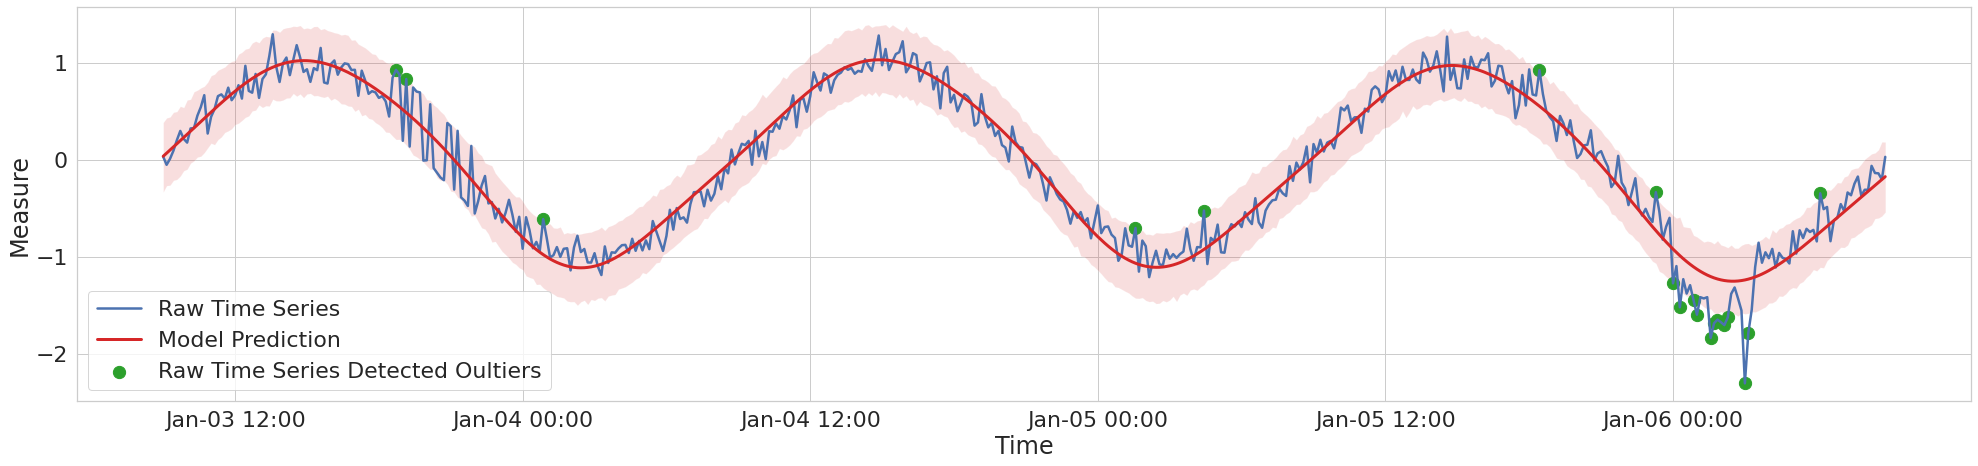

In [71]:
myFmt = mdates.DateFormatter('%b-%d %H:%M')

fig, ax=plt.subplots()

plt.plot(df['timestamp'], df['measure'], linewidth=2.5, label='Raw Time Series')
plt.plot(df['timestamp'], df['yhat'], linewidth=3, label='Model Prediction', color='tab:red')
plt.gca().xaxis.set_major_formatter(myFmt)

ax.fill_between(df['timestamp'], df['yhat_lower'], df['yhat_upper'], facecolor='tab:red', alpha=0.15)
plt.scatter(raw_outliers_df['timestamp'], raw_outliers_df['measure'], color='tab:green', s=150, label='Raw Time Series Detected Oultiers')

# plt.xlim(datetime.datetime(2022, 1, 3, 6, 0), datetime.datetime(2022, 1, 6, 12, 0))
ax.set_xticks(ax.get_xticks()[:-1])
plt.xlabel('Time');plt.ylabel('Measure');plt.legend(fontsize=22);plt.tight_layout()
plt.savefig('figures/raw_time_series.svg')

# Aggregated Views

In [56]:
df_agg = pd.read_pickle('example/part2/df_agg.pickle')
df_agg['timestamp'] = pd.date_range(start='2022-01-3 9:00', periods=len(df_agg.index), freq='51.4284min')
df_agg
# df_agg['time'] = np.nan
# for idx, row in df_agg.iterrows():
#     timestamp = row['timestamp']
#     time = df[df['timestamp']==timestamp]['time'].values
#     df_agg.loc[idx, 'time'] = time

,timestamp,measure,residual_sum,num_raw_data_fit_outliers,is_outlier_num_outliers,is_outlier_residual,predicted_num_raw_data_fit_outliers,predicted_num_raw_data_fit_outliers_lower,predicted_num_raw_data_fit_outliers_upper,predicted_residual_sum,predicted_residual_sum_lower,predicted_residual_sum_upper,num_raw_data_fit_outliers_abs_residual,residual_sum_abs_residual,num_raw_data_fit_outliers_norm_residual,residual_sum_norm_residual
0,2022-01-03 09:00:00.000,0.095705,0.388787,0,0,0,-0.120896,-1.510930,1.160651,0.645494,-0.171937,1.641456,0.120896,0.256707,0.034744,0.154157
1,2022-01-03 09:51:25.704,0.338748,0.371423,0,0,0,-0.112240,-1.358019,1.101424,0.648522,-0.236442,1.497580,0.112240,0.277099,0.032250,0.166740
2,2022-01-03 10:42:51.408,0.537361,0.665487,0,0,0,-0.103584,-1.461377,1.239825,0.651549,-0.254979,1.599221,0.103584,0.013938,0.029757,0.004357
3,2022-01-03 11:34:17.112,0.673863,0.379940,0,0,0,-0.094929,-1.359888,1.086248,0.654577,-0.233451,1.557522,0.094929,0.274636,0.027263,0.165221
4,2022-01-03 12:25:42.816,0.786304,0.767906,0,0,0,-0.086273,-1.452947,1.252367,0.657604,-0.363276,1.533010,0.086273,0.110302,0.024770,0.063818
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
79,2022-01-06 04:42:50.616,-0.890344,0.610873,0,0,0,0.562924,-0.821796,1.722268,0.884755,-0.001551,1.819950,0.562924,0.273882,0.162078,0.164755
80,2022-01-06 05:34:16.320,-0.647911,1.000231,1,0,0,0.571580,-0.701626,1.833779,0.887785,-0.053027,1.793044,0.428420,0.112446,0.123331,0.065141
81,2022-01-06 06:25:42.024,-0.591198,0.504398,0,0,0,0.580237,-0.737096,1.951584,0.890815,0.004750,1.758587,0.580237,0.386418,0.167065,0.234195
82,2022-01-06 07:17:07.728,-0.302243,0.783232,0,0,0,0.588893,-0.708690,1.823233,0.893845,-0.026541,1.825032,0.588893,0.110613,0.169558,0.064010


In [57]:
num_outliers_df = df_agg[df_agg['is_outlier_num_outliers'] > 0]
residual_outliers_df = df_agg[df_agg['is_outlier_residual'] > 0]

In [58]:
sns.set(rc={'figure.figsize':(14, 7)}, font_scale=1.75)
sns.set_style(style='whitegrid')

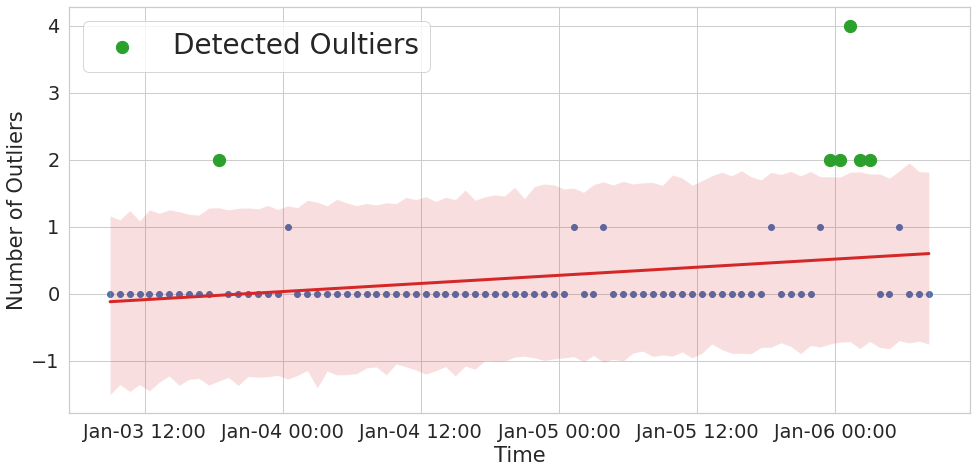

In [59]:
fig, ax=plt.subplots()

plt.scatter(df_agg['timestamp'], df_agg['num_raw_data_fit_outliers'])
plt.scatter(num_outliers_df['timestamp'], num_outliers_df['num_raw_data_fit_outliers'], color='tab:green', s=150, label='Detected Oultiers')
plt.plot(df_agg['timestamp'], df_agg['predicted_num_raw_data_fit_outliers'], linewidth=3, color='tab:red')
ax = ax.fill_between(df_agg['timestamp'], df_agg['predicted_num_raw_data_fit_outliers_lower'], df_agg['predicted_num_raw_data_fit_outliers_upper'], facecolor='tab:red', alpha=0.15)

myFmt = mdates.DateFormatter('%b-%d %H:%M')
plt.gca().xaxis.set_major_formatter(myFmt)

plt.xlabel('Time');plt.ylabel('Number of Outliers');plt.legend(fontsize=28);plt.tight_layout()
plt.savefig('figures/agg_num_outliers.svg')

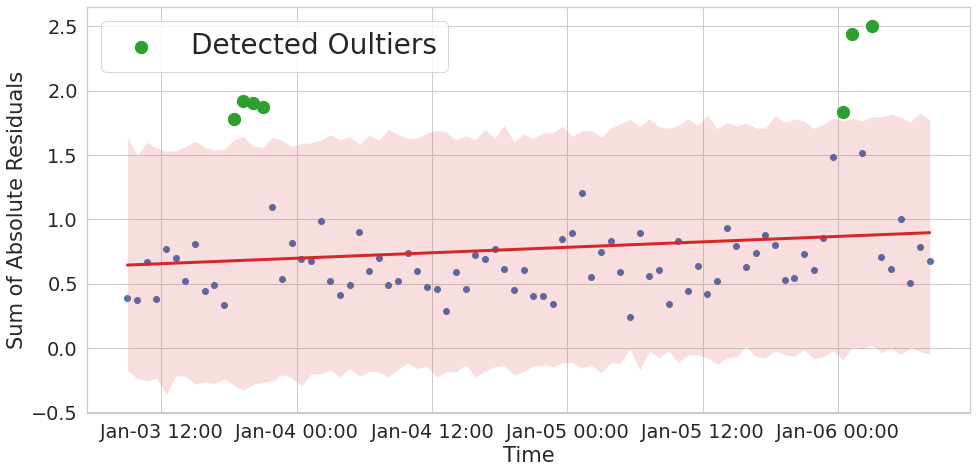

In [60]:
fig, ax=plt.subplots()

plt.scatter(df_agg['timestamp'], df_agg['residual_sum'])
plt.scatter(residual_outliers_df['timestamp'], residual_outliers_df['residual_sum'], color='tab:green', s=150, label='Detected Oultiers')
plt.plot(df_agg['timestamp'], df_agg['predicted_residual_sum'], linewidth=3, color='tab:red')
ax = ax.fill_between(df_agg['timestamp'], df_agg['predicted_residual_sum_lower'], df_agg['predicted_residual_sum_upper'], facecolor='tab:red', alpha=0.15)

myFmt = mdates.DateFormatter('%b-%d %H:%M')
plt.gca().xaxis.set_major_formatter(myFmt)

plt.xlabel('Time');plt.ylabel('Sum of Absolute Residuals');plt.legend(fontsize=28);plt.tight_layout()
plt.savefig('figures/agg_sum_of_absolute_residuals.svg')

# Outlier Density

In [61]:
density_df = pd.read_pickle('example/part2/density_df.pickle')

# Convert the unix_time column of density_df to time to be consistent with all figures 
unix_start_time = df.loc[0, 'unix_time']
unix_end_time = df.loc[df.index[-1], 'unix_time']
time_start = 0.0
time_end = df.loc[df.index[-1], 'time']

time_units_per_unix_time_unit = (time_end - time_start) / (unix_end_time - unix_start_time)

# Remove rows from density_df that are before the unix_start time
density_df = density_df[density_df['unix_time'] >= unix_start_time]

# Add the time column to density_df
density_df['time'] = np.nan
for idx, row in density_df.iterrows():
    delta = row['unix_time'] - unix_start_time
    time = delta * time_units_per_unix_time_unit
    density_df.loc[idx, 'time'] = time

density_df['timestamp'] = pd.date_range(start='2022-01-3 9:00', periods=len(density_df.index), freq='2.859min')

density_df

,unix_time,density,timestamp,time
1,1.590971e+09,2.220446e-16,2022-01-03 09:00:00.000,0.011435
2,1.590972e+09,2.220446e-16,2022-01-03 09:02:51.540,0.023912
3,1.590973e+09,2.220446e-16,2022-01-03 09:05:43.080,0.036388
4,1.590974e+09,2.220446e-16,2022-01-03 09:08:34.620,0.048864
5,1.590975e+09,2.220446e-16,2022-01-03 09:11:26.160,0.061340
...,...,...,...,...
1507,1.592776e+09,1.119003e-08,2022-01-06 08:45:39.240,18.800692
1508,1.592777e+09,7.282108e-09,2022-01-06 08:48:30.780,18.813168
1509,1.592778e+09,3.320270e-09,2022-01-06 08:51:22.320,18.825644
1510,1.592779e+09,2.220446e-16,2022-01-06 08:54:13.860,18.838121


In [62]:
clusters_df = pd.read_pickle('example/part2/clusters_df.pickle')
clusters_df = clusters_df.sort_values(by='area_pts', ascending=False)
clusters_df

,cluster_id,start,end,point_start,point_end,time_length,num_points,area,area_pts
5,9,1.592472e+09,1.592779e+09,1.592539e+09,1.592712e+09,306827.266711,32,0.632818,0.576681
0,1,1.591140e+09,1.591358e+09,1.591207e+09,1.591290e+09,218135.009927,24,0.330194,0.218281
1,2,1.591358e+09,1.591437e+09,1.591369e+09,1.591369e+09,79103.904699,1,0.006386,0.000000
2,4,1.591925e+09,1.591997e+09,1.591992e+09,1.591992e+09,71912.640635,1,0.005496,0.000000
3,6,1.592060e+09,1.592132e+09,1.592064e+09,1.592064e+09,71912.640635,1,0.005538,0.000000
4,8,1.592349e+09,1.592472e+09,1.592417e+09,1.592417e+09,123450.033091,1,0.009950,0.000000


In [63]:
density_df_indices_for_local_minima=[140, 320, 1260, 1460]

In [64]:
region1_start = mdates.date2num(density_df.iloc[140]['timestamp'])
region1_width = mdates.date2num(density_df.iloc[320]['timestamp']) - region1_start
region2_start = mdates.date2num(density_df.iloc[1260]['timestamp'])
region2_width = mdates.date2num(density_df.iloc[1460]['timestamp']) - region2_start

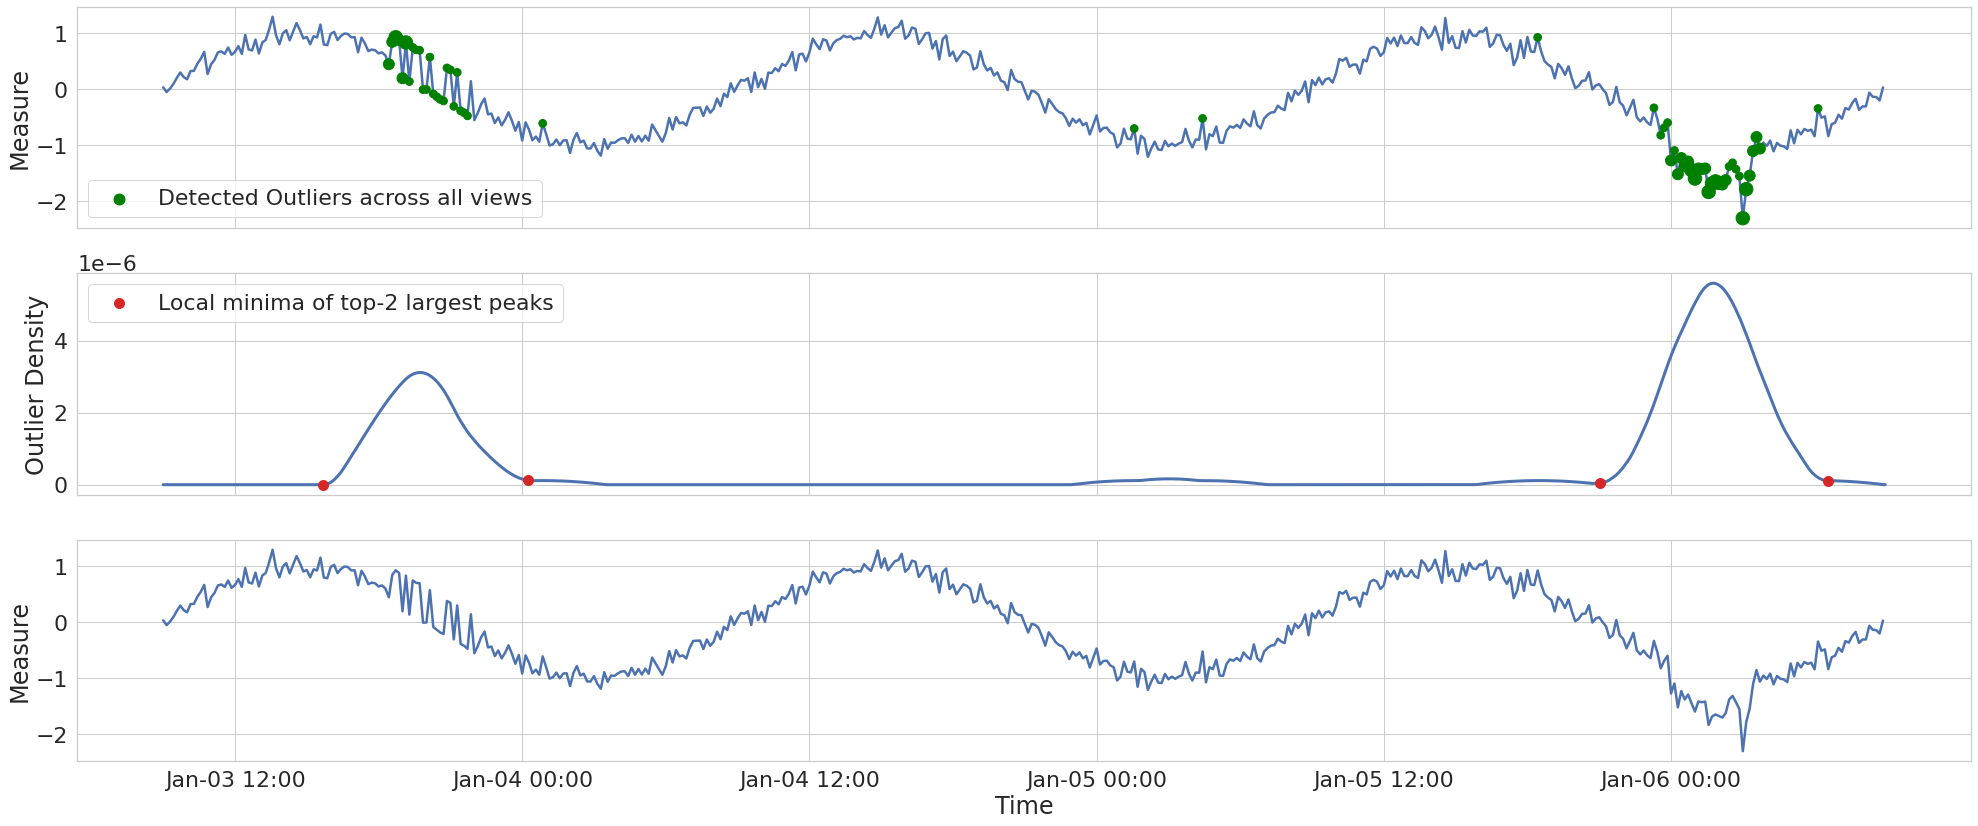

In [65]:
sns.set(rc={'figure.figsize':(28, 12)}, font_scale=2)
sns.set_style(style='whitegrid')

fig, axs = plt.subplots(3, sharex=True)
fig.subplots_adjust(hspace=0)

# Plot the base time series with the outliers detected across all views
axs[0].plot(df['timestamp'], df['measure'], linewidth=2.5)
axs[0].scatter(df[df['raw_voting_score']>0]['timestamp'].values, df[df['raw_voting_score']>0]['measure'].values, s=60*df[df['raw_voting_score']>0]['raw_voting_score'] , c='green', zorder=10, label='Detected Outliers across all views')
axs[0].set_ylabel('Measure');axs[0].legend()

# Plot the outlier density curve
axs[1].plot(density_df['timestamp'], density_df['density'], linewidth=3)
axs[1].scatter(density_df.iloc[density_df_indices_for_local_minima]['timestamp'], density_df.iloc[density_df_indices_for_local_minima]['density'], s=100, zorder=10, c='tab:red', label='Local minima of top-2 largest peaks')
axs[1].set_ylabel('Outlier Density');axs[1].legend()

# Plot the aleratable regions
axs[2].plot(df['timestamp'], df['measure'], linewidth=2.5)
# axs[2].add_patch(patches.Rectangle((region1_start, -1), width=region1_width, height=2.5, linewidth=0, color='yellow', zorder=10, alpha=0.50))
# axs[2].add_patch(patches.Rectangle((region2_start, -2.5), width=region2_width, height=3, linewidth=0, color='yellow', zorder=10, alpha=0.50))
axs[2].set_ylabel('Measure');axs[2].set_xlabel('Time')
axs[2].set_xticks(axs[2].get_xticks()[:-1])

myFmt = mdates.DateFormatter('%b-%d %H:%M')
plt.gca().xaxis.set_major_formatter(myFmt)

fig.tight_layout()
plt.savefig('figures/outliers_density_regions.svg')